In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

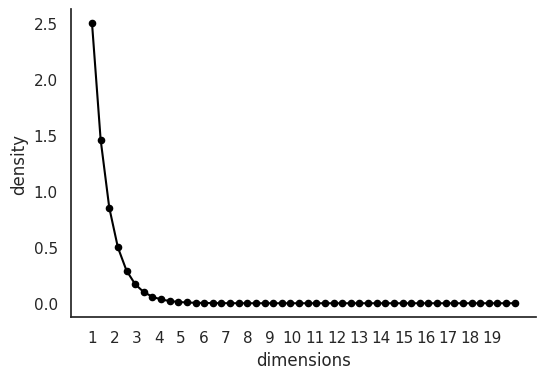

In [22]:
# Generate data
x = np.linspace(1, 20)
y = 10/4**x

# Set the style to plain
sns.set(style="white", rc={"axes.grid": False})

# Create the plot
plt.figure(figsize=(6, 4))
sns.lineplot(x=x, y=y, color='black')
plt.scatter(x, y, color='black', s=20)
plt.xticks(np.arange(1, 20))
plt.xlabel("dimensions")
plt.ylabel("density")

# Remove axes spines for a cleaner look
sns.despine()

# Save the plot as an SVG file
plt.savefig("figs/density.png", format="png", bbox_inches='tight')

# Show the plot (optional)
plt.show()

/tmp/ipykernel_2758/3993623320.py:121: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax3.legend()


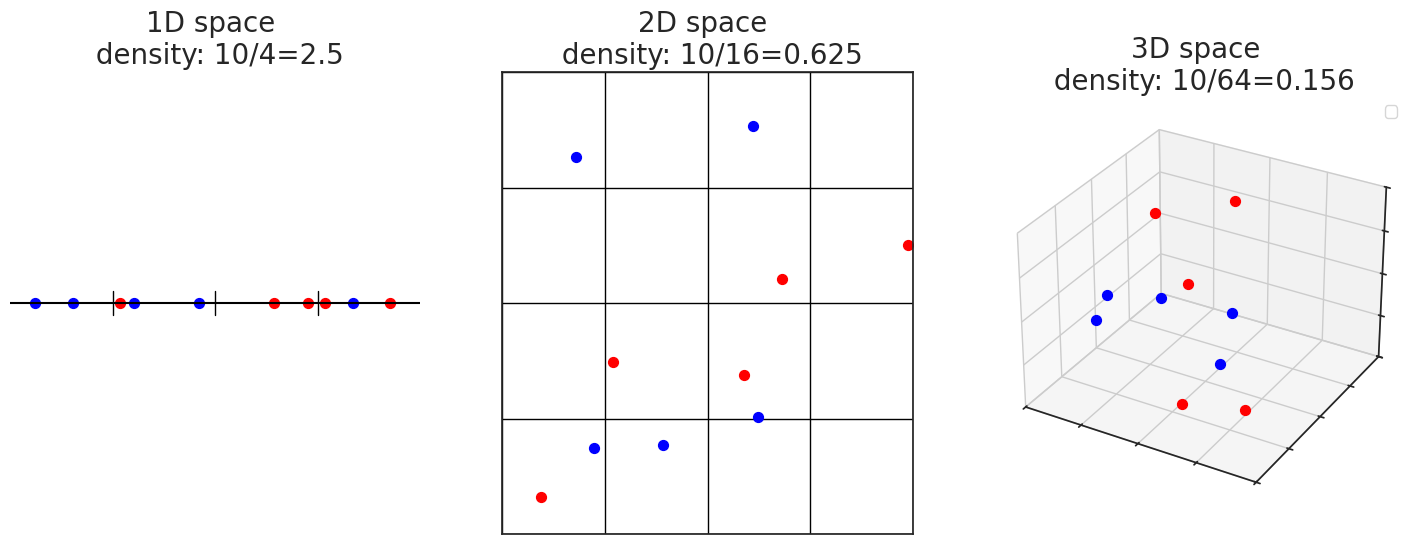

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(18, 6))

# Create the first subplot
ax1 = fig.add_subplot(131)
ax1.set_title('1D space \n density: 10/4=2.5', fontsize=20)

# Create the second subplot
ax2 = fig.add_subplot(132)
ax2.set_title('2D space \n density: 10/16=0.625', fontsize=20)

# Create the third subplot
ax3 = fig.add_subplot(133, projection='3d')
ax3.set_title('3D space \n density: 10/64=0.156', fontsize=20)

################### 1D ######################
x = np.linspace(0, 10, 100)
np.random.seed(777)  # For reproducibility
num_dots = 10
dot_positions = np.random.uniform(0, 10, num_dots)

# Separate the positions into two groups
blue_positions = dot_positions[:5]
red_positions = dot_positions[5:]

# Plot the line
ax1.plot(x, np.zeros_like(x), color='black')  # 1D line at y = 0

# Plot the blue dots
ax1.scatter(blue_positions, np.zeros_like(blue_positions), color='blue', s=50, label='Blue Dots')

# Plot the red dots
ax1.scatter(red_positions, np.zeros_like(red_positions), color='red', s=50, label='Red Dots')

# Define positions for the ticks
tick_positions = [2.5, 5, 7.5]  # 4 evenly spaced ticks

# Set the tick positions
ax1.set_xticks(tick_positions)

# Remove tick labels
ax1.set_xticklabels([])

# Hide the default ticks and add custom ticks
ax1.tick_params(axis='x', which='both', length=0)  # Remove default tick marks
for tick in tick_positions:
    ax1.plot([tick, tick], [-0.005, 0.005], color='black', lw=1)  # Custom tick marks on the line

# Customize tick lines to be small
# ax1.tick_params(axis='x', which='both', length=5, width=1, color='black')
# Customize tick lines to be small and adjust their position

# Hide the y-axis
ax1.yaxis.set_ticks([])
ax1.yaxis.set_tick_params(width=0)

# Hide spines
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_visible(False)

# Set limits to ensure all ticks are visible
ax1.set_xlim(0, 10)
ax1.set_ylim(-0.1, 0.1)  # Adjust y-limits if necessary

################### 2D ######################
points = np.random.uniform(-2, 2, size=(10, 2))
red_points = points[:5]
blue_points = points[5:]

ax2.scatter(red_points[:, 0], red_points[:, 1], color='red', s=50, label='Red Points')
ax2.scatter(blue_points[:, 0], blue_points[:, 1], color='blue', s=50, label='Blue Points')

ax2.set_xlim([-2, 2])
ax2.set_ylim([-2, 2])

# Set grid lines and remove axis labels
ax2.set_xticks(np.arange(-2, 3, 1))
ax2.set_yticks(np.arange(-2, 3, 1))
ax2.set_xticklabels([])
ax2.set_yticklabels([])

# Add grid lines
ax2.grid(True, color='black')

################### 3D ######################
# Generate 10 random points within a 4x4x4 grid
np.random.seed(42)  # For reproducibility
points = np.random.uniform(-2, 2, size=(10, 3))  # Range from -2 to 2 for a 4x4x4 grid

# Separate the points into two groups
red_points = points[:5]
blue_points = points[5:]

# Plot the red points
ax3.scatter(red_points[:, 0], red_points[:, 1], red_points[:, 2], color='red', s=50, depthshade=False)

# Plot the blue points
ax3.scatter(blue_points[:, 0], blue_points[:, 1], blue_points[:, 2], color='blue', s=50, depthshade=False)

# Set the limits for a 4x4x4 grid
ax3.set_xlim([-2, 2])
ax3.set_ylim([-2, 2])
ax3.set_zlim([-2, 2])

# Remove the axis numbers but keep the grid lines
ax3.set_xticks(np.arange(-2, 3, 1))
ax3.set_yticks(np.arange(-2, 3, 1))
ax3.set_zticks(np.arange(-2, 3, 1))

# Hide tick labels while keeping grid lines
ax3.set_xticklabels([])
ax3.set_yticklabels([])
ax3.set_zticklabels([])

# Add a legend
ax3.legend()
ax3.grid(True, color='black')

plt.savefig("figs/dimensions_density.png", format="png", bbox_inches='tight')
# Show the plot
plt.show()


In [16]:
import seaborn as sns
import numpy as np
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
def gen_data(samples, dims):
    data = np.random.normal(0,1, (samples, dims))
    # data = (data - data.mean(axis=0)) / data.std(axis=0)
    distances = cdist(data, data, metric='euclidean').flatten()
    distances = distances[distances != 0]
    max_dist = np.max(distances)
    distances = distances / max_dist
    distances = distances / (np.sqrt(dims)/2)
    return data, distances

/tmp/ipykernel_37332/943133335.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(distances, hist=True, kde=True, color='b', ax=ax)
/tmp/ipykernel_37332/943133335.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(distances, hist=True, kde=True, color='b', ax=ax)
/tmp/ipykernel_37332/943133335

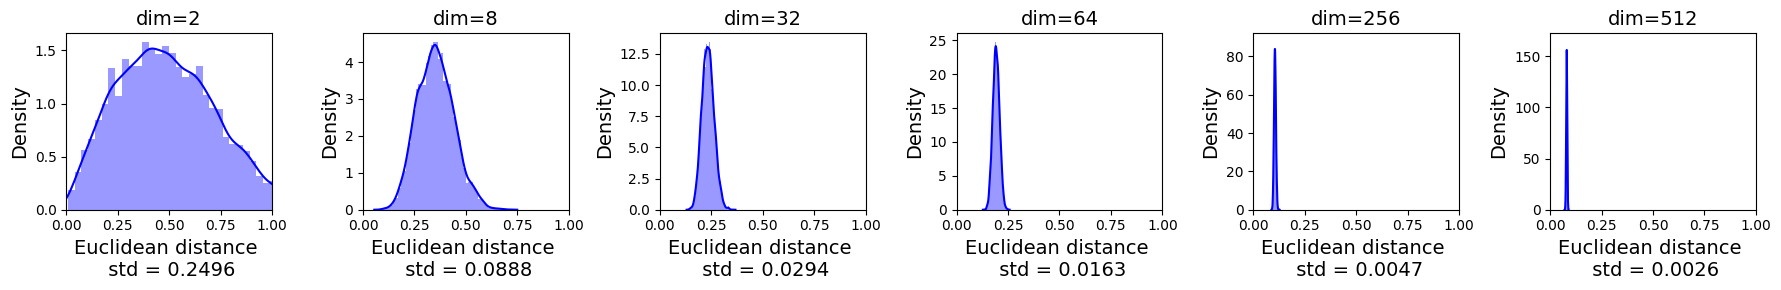

In [68]:
fig, axes = plt.subplots(1, 6, figsize=(18, 3))  # 1 row, 6 columns
samples = 100
# Loop through each axis and plot something or leave it empty
dims = [2,8,32,64,256,512]
for i, (ax, dim) in enumerate(zip(axes, dims)):
    ax.set_title(f'dim={dim}', fontsize=14)
    data, distances = gen_data(samples, dim)
    sns.distplot(distances, hist=True, kde=True, color='b', ax=ax)
    ax.set_xlabel(f'Euclidean distance \n std = {distances.std():.4f}', fontsize=14)
    ax.set_ylabel('Density', fontsize=14)
    ax.set_xlim(0, 1)

# Adjust the layout to prevent overlap
plt.tight_layout()

plt.savefig("figs/dim_distances.png", format="png", bbox_inches='tight')

plt.show()